<a href="https://colab.research.google.com/github/PolyGon-13/DataScience_Study/blob/main/Visualization/01_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

In [16]:
# 해당 명령어 실행 후 세션 다시 시작 후 아래 명령어 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,560 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123605 files and dire

In [2]:
# 코랩 환경에서 한글 깨짐 해결 방법
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# Line Plot

In [ ]:
df=pd.read_excel('./data/시도별_전출입_인구수.xlsx')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [ ]:
df=df.ffill() # 누락값을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [ ]:
mask=(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'],axis=1)
df_seoul=df_seoul.rename({'전입지별':'전입지'},axis=1)
df_seoul=df_seoul.set_index('전입지')
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [ ]:
sr_one=df_seoul.loc['경기도']
sr_one.head()

,경기도
1970,130149
1971,150313
1972,93333
1973,143234
1974,149045


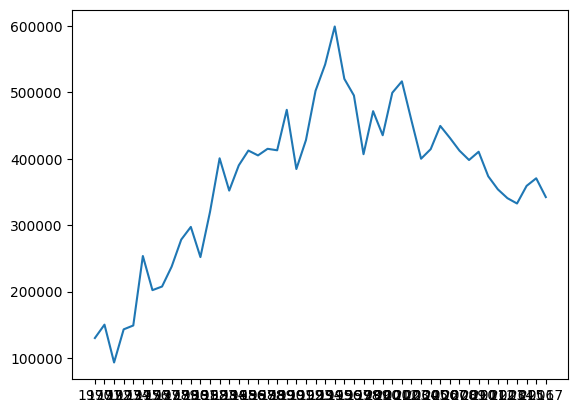

In [ ]:
plt.plot(sr_one.index,sr_one.values)

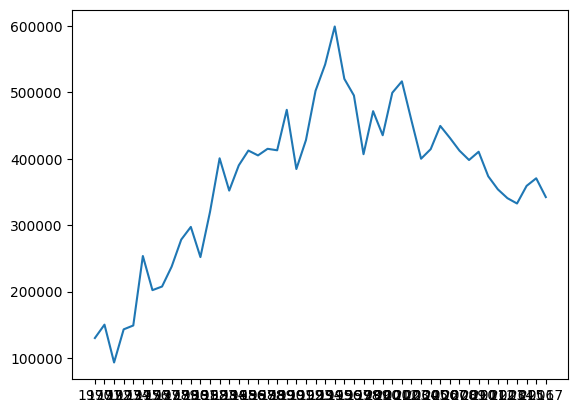

In [ ]:
plt.plot(sr_one)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

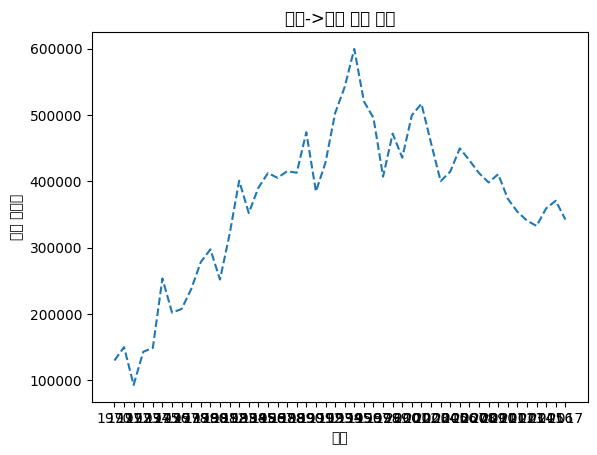

In [ ]:
plt.plot(sr_one.index,sr_one.values,linestyle='--')

plt.title('서울->경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

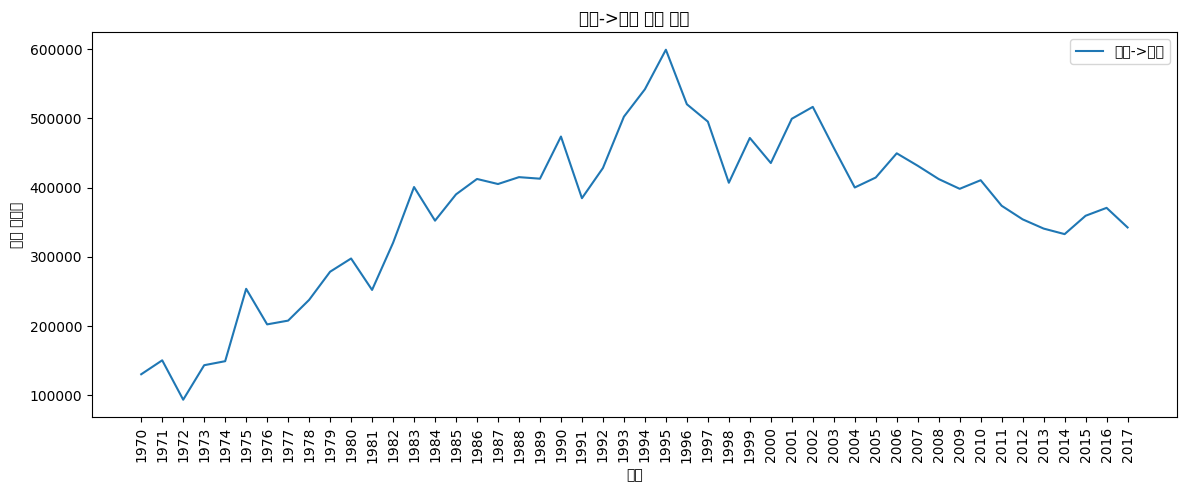

In [ ]:
sr_one=df_seoul.loc['경기도']

plt.figure(figsize=(14,5)) # 그림 사이즈 늘리기
plt.xticks(rotation='vertical') # x축 눈금 회전

plt.plot(sr_one.index,sr_one.values)
plt.title('서울->경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울->경기'],loc='best') # 범례

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

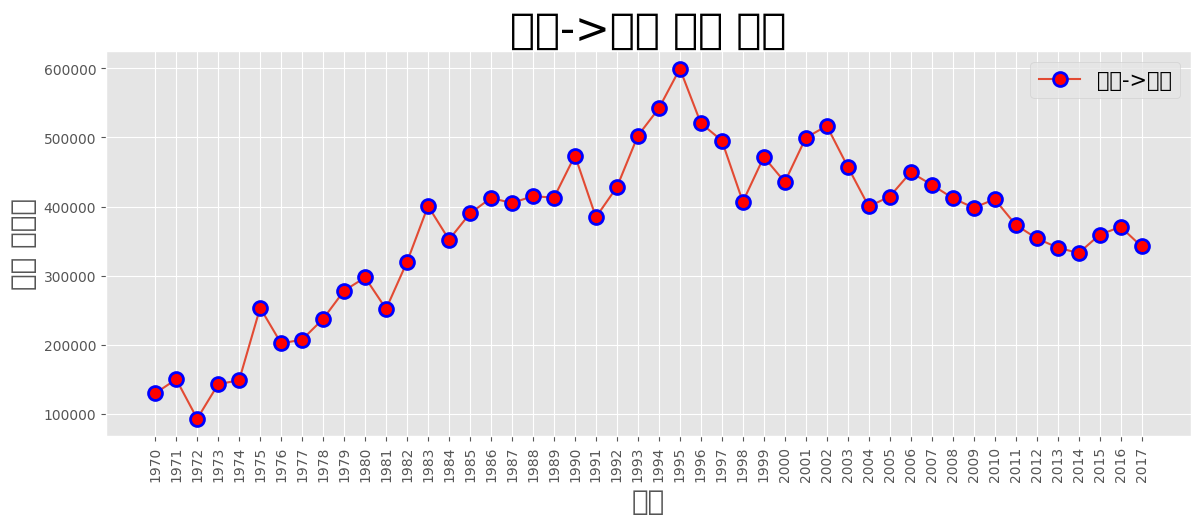

In [ ]:
sr_one=df_seoul.loc['경기도']

plt.style.use('ggplot') # 스타일 서식 지정
plt.figure(figsize=(14,5))
plt.xticks(size=10,rotation='vertical')
plt.plot(sr_one.index,sr_one.values,
         marker='o',
         markerfacecolor='red', # 마커 내부 색
         markeredgecolor='blue', # 마커 테두리 색
         markeredgewidth=2, # 마커 테두리 두께
         markersize=10) # 마커 사이즈 (원의 지름)

plt.title('서울->경기 인구 이동',size=30)
plt.xlabel('기간',size=20)
plt.ylabel('이동 인구수',size=20)
plt.legend(labels=['서울->경기'],loc='best',fontsize=15)

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

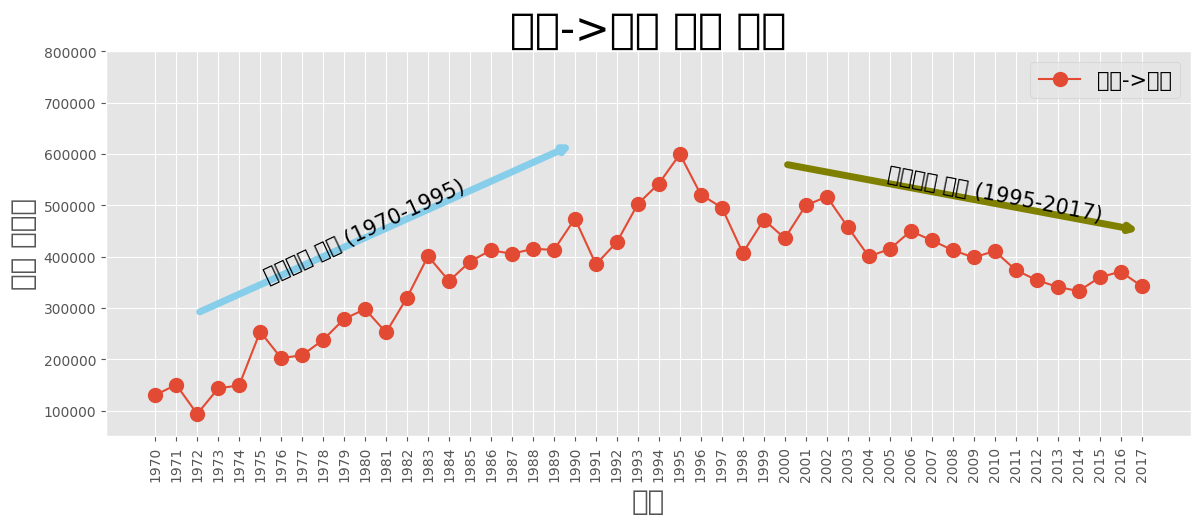

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.xticks(size=10,rotation='vertical')
plt.plot(sr_one.index,sr_one.values,marker='o',markersize=10)

plt.title('서울->경기 인구 이동',size=30)
plt.xlabel('기간',size=20)
plt.ylabel('이동 인구수',size=20)
plt.legend(labels=['서울->경기'],loc='best',fontsize=15)

plt.ylim(50000,800000) # y축 범위 지정

plt.annotate('',
             xy=(20,620000), # 화살표 머리 부분 (끝점)
             xytext=(2,290000), # 화살표 꼬리 부분 (시작점)
             xycoords='data', # 좌표체계
             arrowprops=dict(arrowstyle='->',color='skyblue',lw=5)) # 화살표 서식

plt.annotate('',
             xy=(47,450000),
             xytext=(30,580000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->',color='olive',lw=5))
plt.annotate('인구이동 증가 (1970-1995)', # 텍스트 입력
             xy=(10,350000),
             rotation=25, # 텍스트 회전 각도 (양수=반시계)
             va='baseline', # 텍스트 상하정렬
             ha='center', # 텍스트 좌우정렬
             fontsize=15)

plt.annotate('인구이동 감소 (1995-2017)',
             xy=(40,470000),
             rotation=-11,
             va='baseline',
             ha='center',
             fontsize=15)

plt.show()

## Matplotlib의 기본 구조 (Figure 객체, Axes 객체)

In [ ]:
samsung_revenue=pd.read_csv('./data/삼성전자_분기별_매출액.csv')
samsung_revenue=samsung_revenue.sort_values(by='quarter',ascending=True) # 기준 열, 오름차순 여부
samsung_revenue

,value,quarter
5,77203607000000,2022-Q2
4,76781680000000,2022-Q3
3,70464575000000,2022-Q4
2,63745371000000,2023-Q1
1,60005533000000,2023-Q2
0,67404652000000,2023-Q3


In [ ]:
fig=plt.figure()
print(fig)

Figure(640x480)


<Figure size 640x480 with 0 Axes>

Figure(640x480)
Axes(0.125,0.11;0.775x0.77)


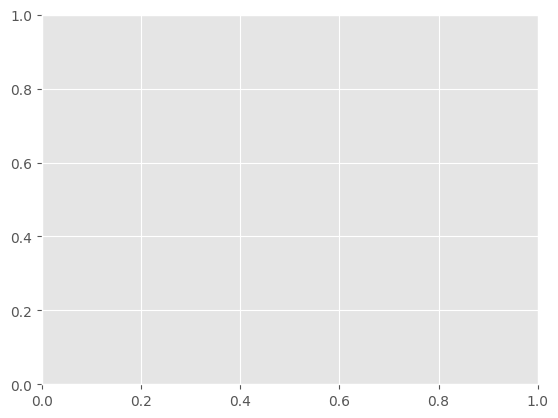

In [ ]:
fig,axe=plt.subplots()
print(fig)
print(axe)

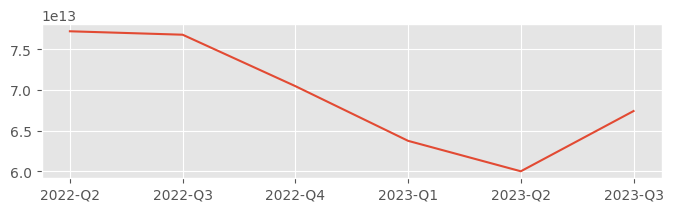

In [ ]:
fig,axe=plt.subplots(figsize=(8,2))
axe.plot(samsung_revenue['quarter'],samsung_revenue['value'])
plt.show()

Figure(640x480)
[<Axes: > <Axes: >]


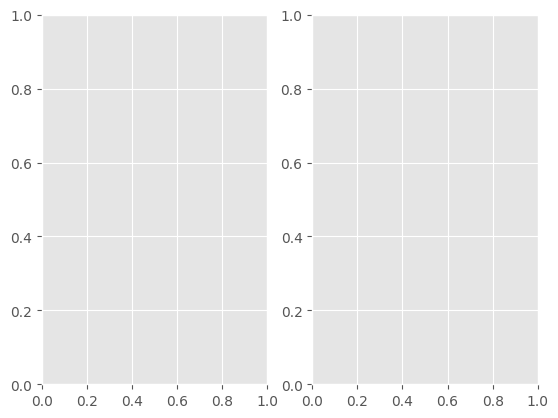

In [ ]:
fig,axes=plt.subplots(1,2)
print(fig)
print(axes)

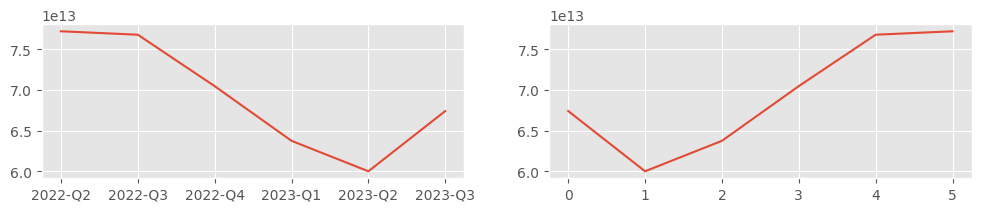

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(12,2))
axes[0].plot(samsung_revenue['quarter'],samsung_revenue['value'])
samsung_revenue['value'].plot(ax=axes[1])
plt.show()

Figure(640x480)
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


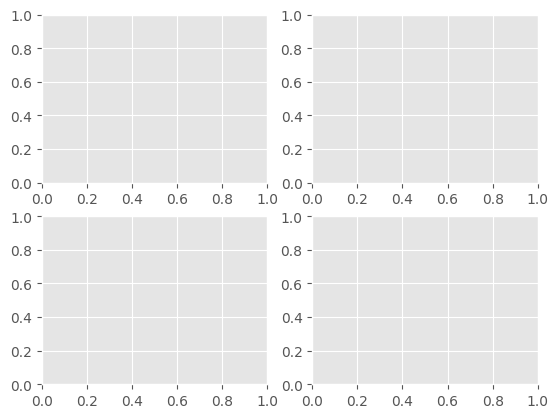

In [ ]:
fig,axes=plt.subplots(2,2)
print(fig)
print(axes)

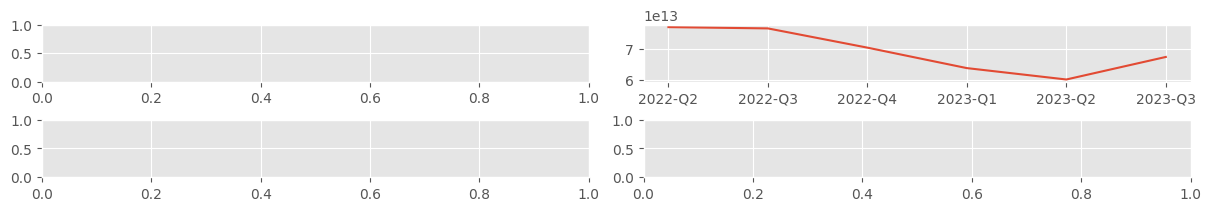

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(12,2),constrained_layout=True) # constrained_layout은 4개의 subplot들 사이의 간격을 자동으로 조정하여 겹치지 않도록 하는 옵션
axes[0,1].plot(samsung_revenue['quarter'],samsung_revenue['value'])
plt.show()

Figure(640x480)
{'top_left': <Axes: label='top_left'>, 'right': <Axes: label='right'>, 'bottom_left': <Axes: label='bottom_left'>}


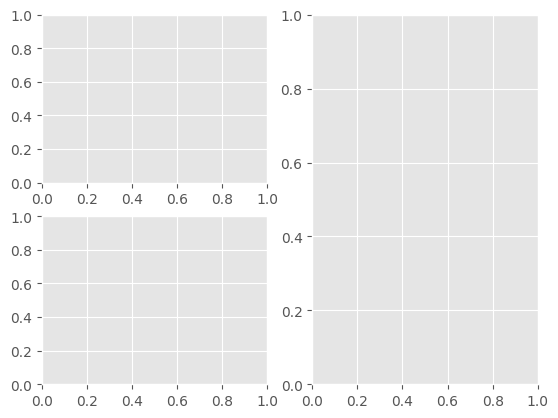

In [ ]:
fig,axes=plt.subplot_mosaic([['top_left','right'],
                             ['bottom_left','right']])
print(fig)
print(axes)

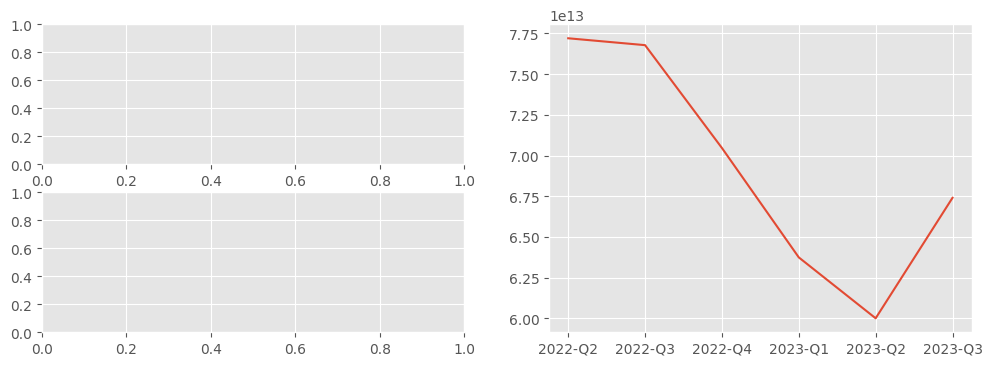

In [ ]:
fig,axes=plt.subplot_mosaic([['top_left','right'],
                             ['bottom_left','right']],
                            figsize=(12,4))
axes['right'].plot(samsung_revenue['quarter'],samsung_revenue['value'])
plt.show()

## Axes 객체 그래프 꾸미기

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

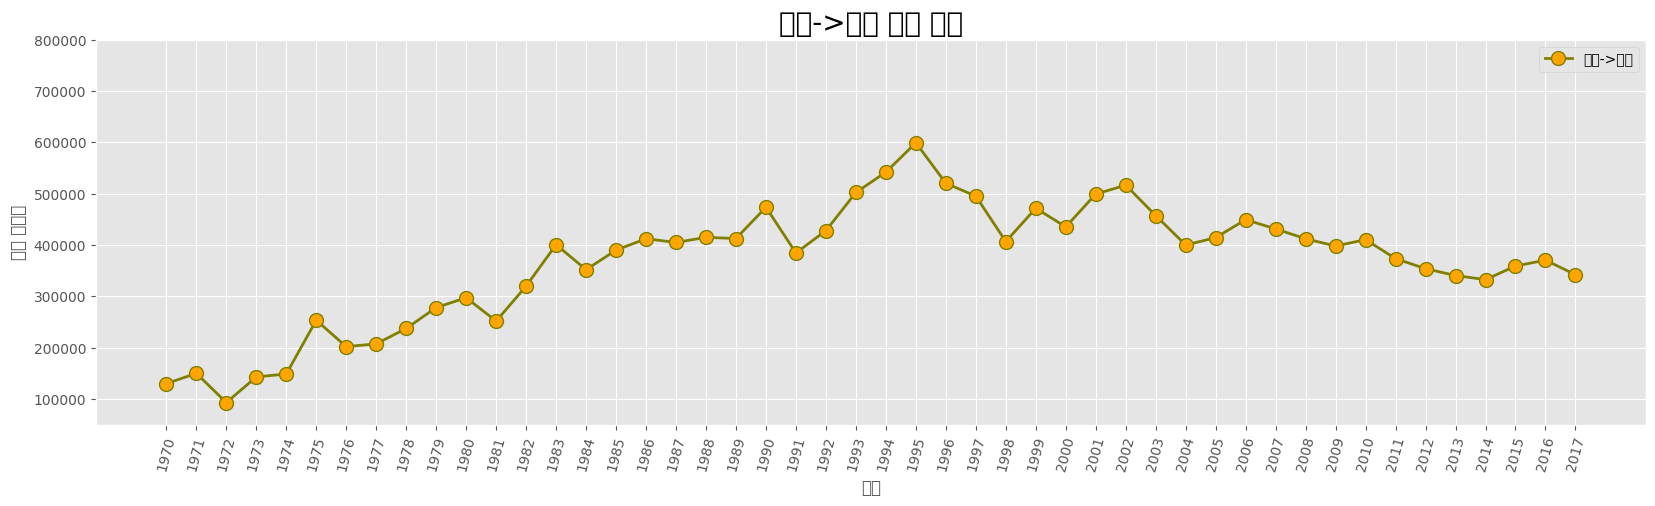

In [ ]:
plt.style.use('ggplot')

fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(1,1,1)

ax.plot(sr_one,marker='o',markerfacecolor='orange',markersize=10,
        color='olive',linewidth=2,label='서울->경기') # label로 plot 함수에서 범례 지정
ax.legend(loc='best')

ax.set_ylim(50000,800000)

ax.set_title('서울->경기 인구 이동',size=20)

ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

ax.set_xticks(sr_one.index) # x축에 표시할 특정 눈금 지정
ax.set_xticklabels(sr_one.index,rotation=75) # x축의 특정 눈금에 대한 텍스트 지정

ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

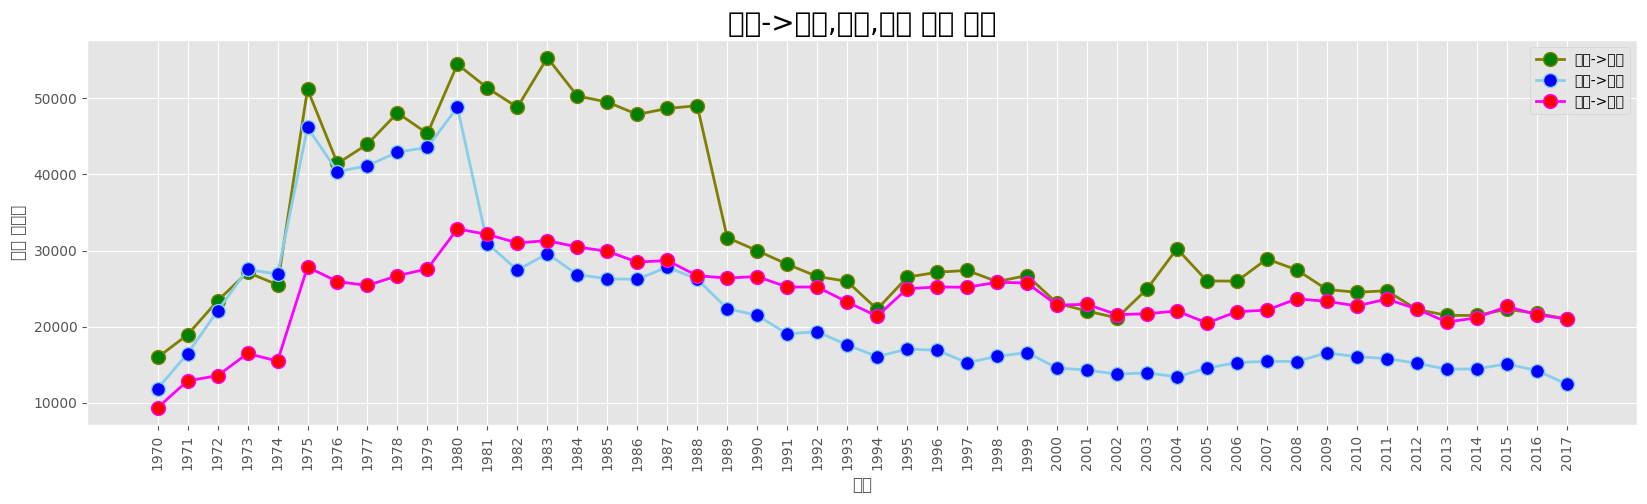

In [ ]:
col_years=list(map(str,range(1970,2018))) # map(str,a)는 a를 문자열로 변경, list(b)로 b를 리스트로 저장 => ['1970','1971', ... , '2018']
df_3=df_seoul.loc[['충청남도','경상북도','강원도'],col_years]

plt.style.use('ggplot')

fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(1,1,1)

ax.plot(col_years,df_3.loc['충청남도',:],marker='o',markerfacecolor='green',
        markersize=10,color='olive',linewidth=2,label='서울->충남')
ax.plot(col_years,df_3.loc['경상북도',:],marker='o',markerfacecolor='blue',
        markersize=10,color='skyblue',linewidth=2,label='서울->경북')
ax.plot(col_years,df_3.loc['강원도',:],marker='o',markerfacecolor='red',
        markersize=10,color='magenta',linewidth=2,label='서울->강원')

ax.legend(loc='best')

ax.set_title('서울->충남,경북,강원 인구 이동',size=20)
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

ax.set_xticks(range(len(col_years)))
ax.set_xticklabels(col_years,rotation=90)

ax.tick_params(axis="x",labelsize=10)
ax.tick_params(axis="y",labelsize=10)

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

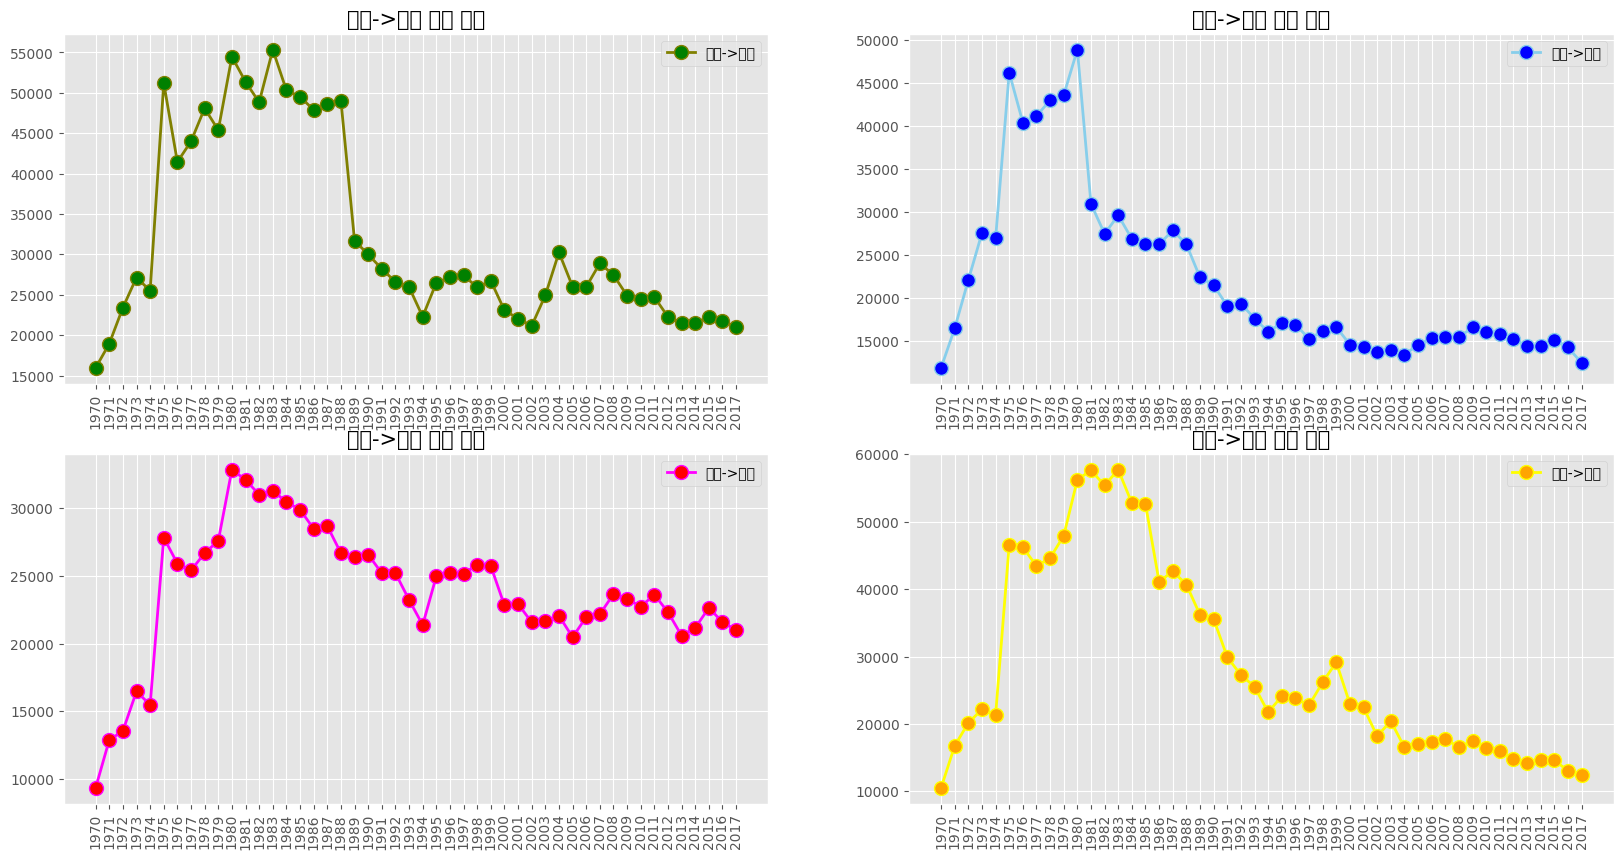

In [ ]:
col_years=list(map(str,range(1970,2018)))
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

plt.style.use('ggplot')

fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.plot(col_years,df_4.loc['충청남도',:],marker='o',markerfacecolor='green',
         markersize=10,color='olive',linewidth=2,label='서울->충남')
ax2.plot(col_years,df_4.loc['경상북도',:],marker='o',markerfacecolor='blue',
         markersize=10,color='skyblue',linewidth=2,label='서울->경북')
ax3.plot(col_years,df_4.loc['강원도',:],marker='o',markerfacecolor='red',
         markersize=10,color='magenta',linewidth=2,label='서울->강원')
ax4.plot(col_years,df_4.loc['전라남도',:],marker='o',markerfacecolor='orange',
         markersize=10,color='yellow',linewidth=2,label='서울->전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울->충남 인구 이동',size=15)
ax2.set_title('서울->경북 인구 이동',size=15)
ax3.set_title('서울->강원 인구 이동',size=15)
ax4.set_title('서울->전남 인구 이동',size=15)

ax1.set_xticks(range(len(col_years)))
ax2.set_xticks(range(len(col_years)))
ax3.set_xticks(range(len(col_years)))
ax4.set_xticks(range(len(col_years)))

ax1.set_xticklabels(col_years,rotation=90)
ax2.set_xticklabels(col_years,rotation=90)
ax3.set_xticklabels(col_years,rotation=90)
ax4.set_xticklabels(col_years,rotation=90)

plt.show()

# Area Plot

In [ ]:
col_years=list(map(str,range(1970,2018)))
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

df_4=df_4.astype(int)
df_4

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [ ]:
df_4=df_4.T
df_4.head(7)

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

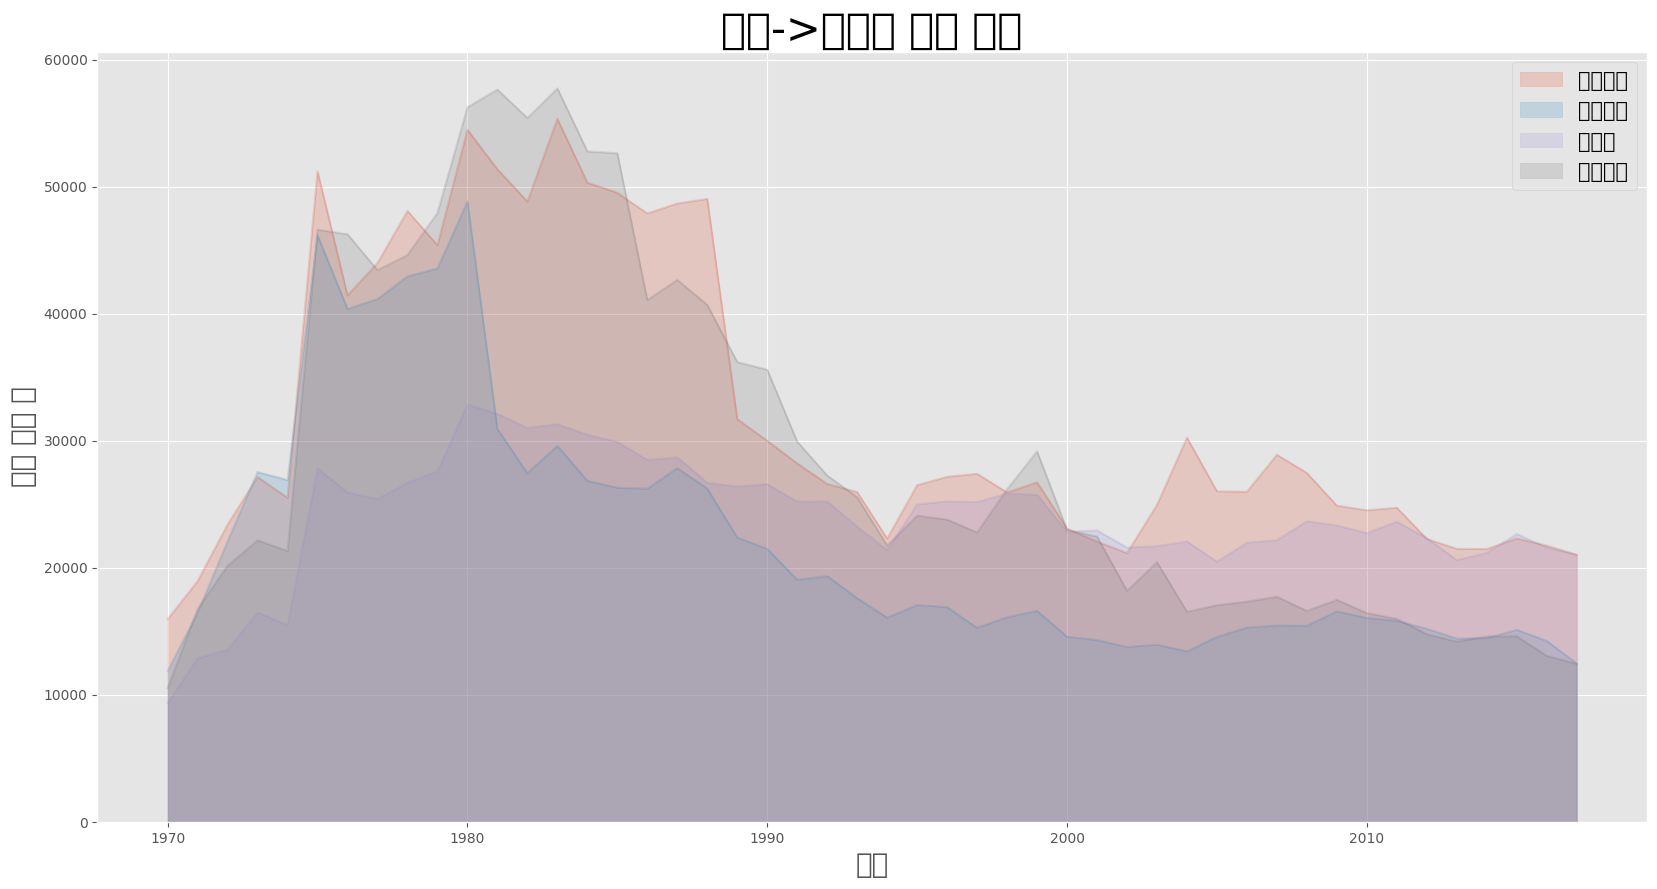

In [ ]:
plt.style.use('ggplot')

df_4.plot(kind='area',stacked=False,alpha=0.2,figsize=(20,10))

plt.title('서울->타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best',fontsize=15)

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

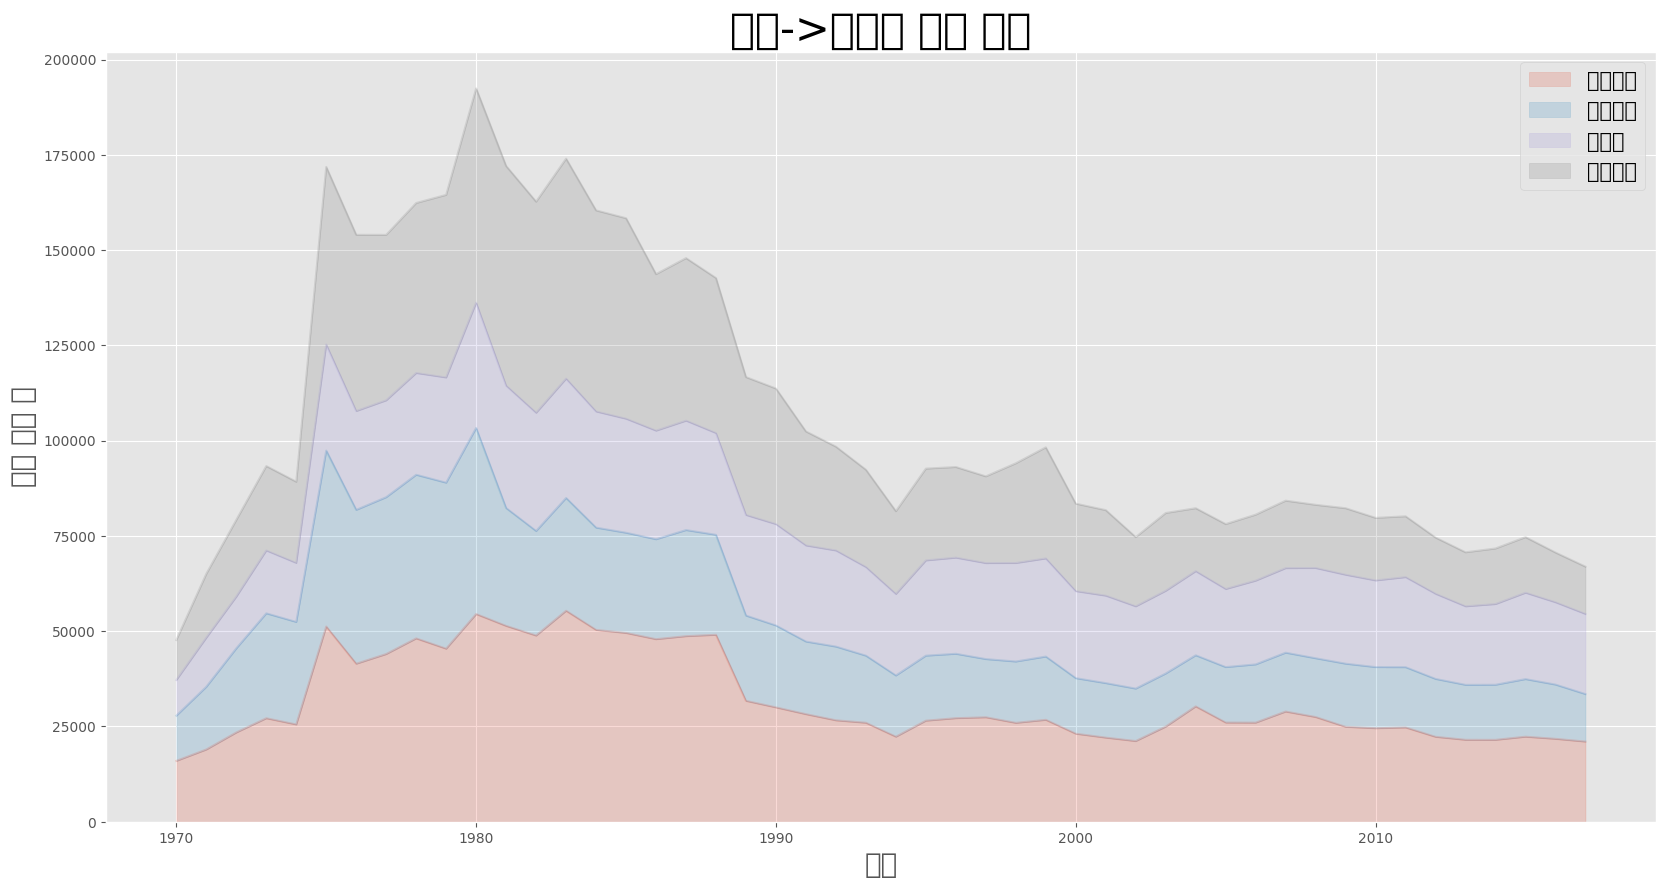

In [ ]:
col_years=list(map(str,range(1970,2018)))
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4=df_4.astype(int)
df_4=df_4.T

plt.style.use('ggplot')

df_4.plot(kind='area',stacked=True,alpha=0.2,figsize=(20,10))

plt.title('서울->타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best',fontsize=15)

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

<class 'matplotlib.axes._axes.Axes'>


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

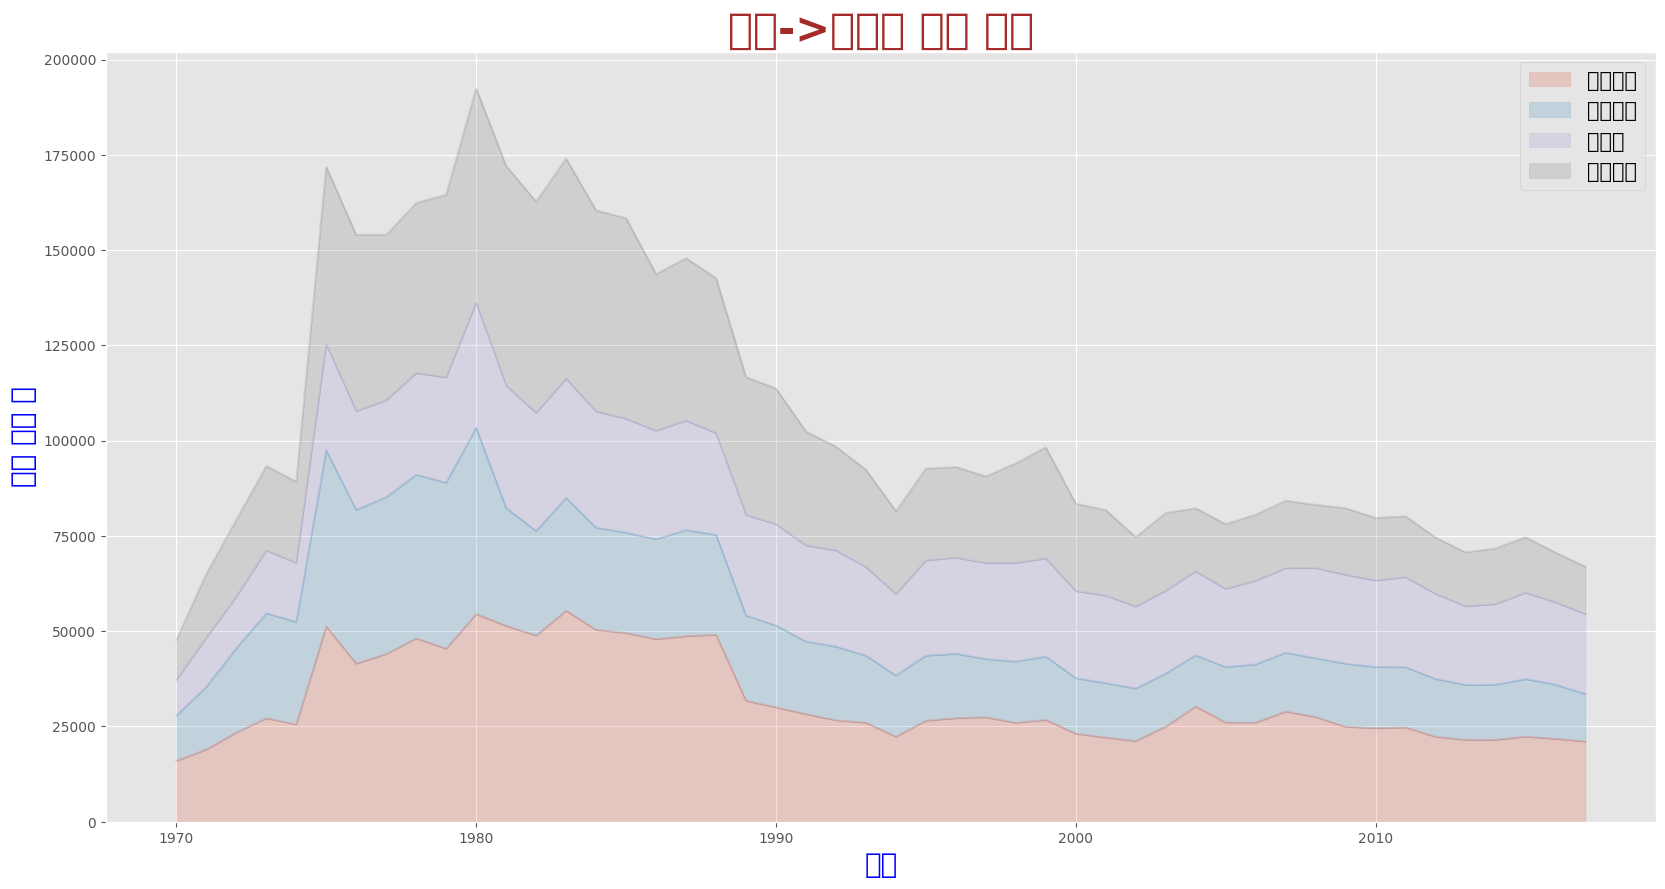

In [ ]:
plt.style.use('ggplot')

ax=df_4.plot(kind='area',stacked=True,alpha=0.2,figsize=(20,10))
print(type(ax))

ax.set_title('서울->타시도 인구 이동',size=30,color='brown',weight='bold')
ax.set_ylabel('이동 인구 수',size=20,color='blue')
ax.set_xlabel('기간',size=20,color='blue')
ax.legend(loc='best',fontsize=15)

plt.show()

# Bar Plot

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

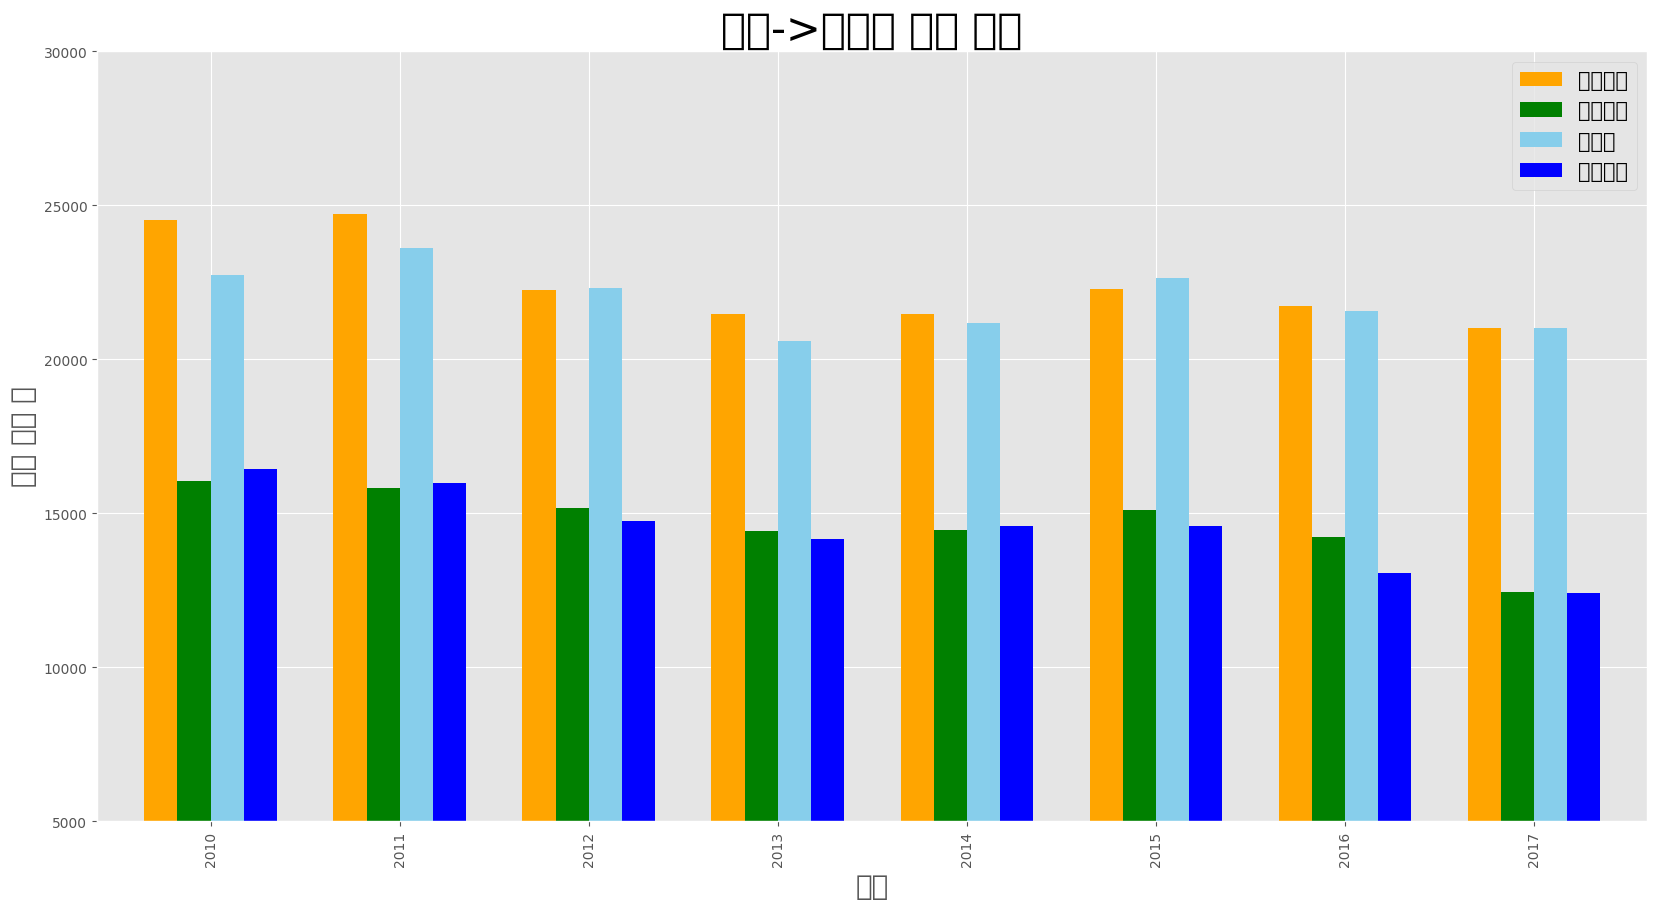

In [ ]:
col_years=list(map(str,range(2010,2018)))
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4=df_4.T

plt.style.use('ggplot')

df_4.index=df_4.index.map(int) # df_4.index.astype(int)

df_4.plot(kind='bar',figsize=(20,10),width=0.7,
          color=['orange','green','skyblue','blue'])

plt.title('서울->타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('기간',size=20)
plt.ylim(5000,30000)
plt.legend(loc='best',fontsize=15)

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

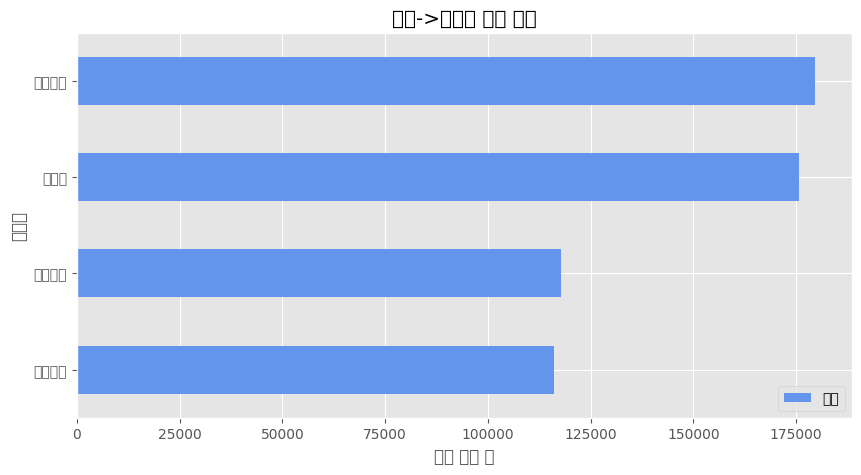

In [ ]:
col_years=list(map(str,range(2010,2018)))
df_4=df_seoul.loc[['충청남도','강원도','경상북도','전라남도'],col_years]

df_4['합계']=df_4.sum(axis=1)
df_total=df_4[['합계']].sort_values(by='합계',ascending=True) # 대괄호 2개를 사용해서 데이터프레임으로 반환되도록 함

plt.style.use('ggplot')

df_total.plot(kind='barh',color='cornflowerblue',width=0.5,figsize=(10,5))

plt.title('서울->타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

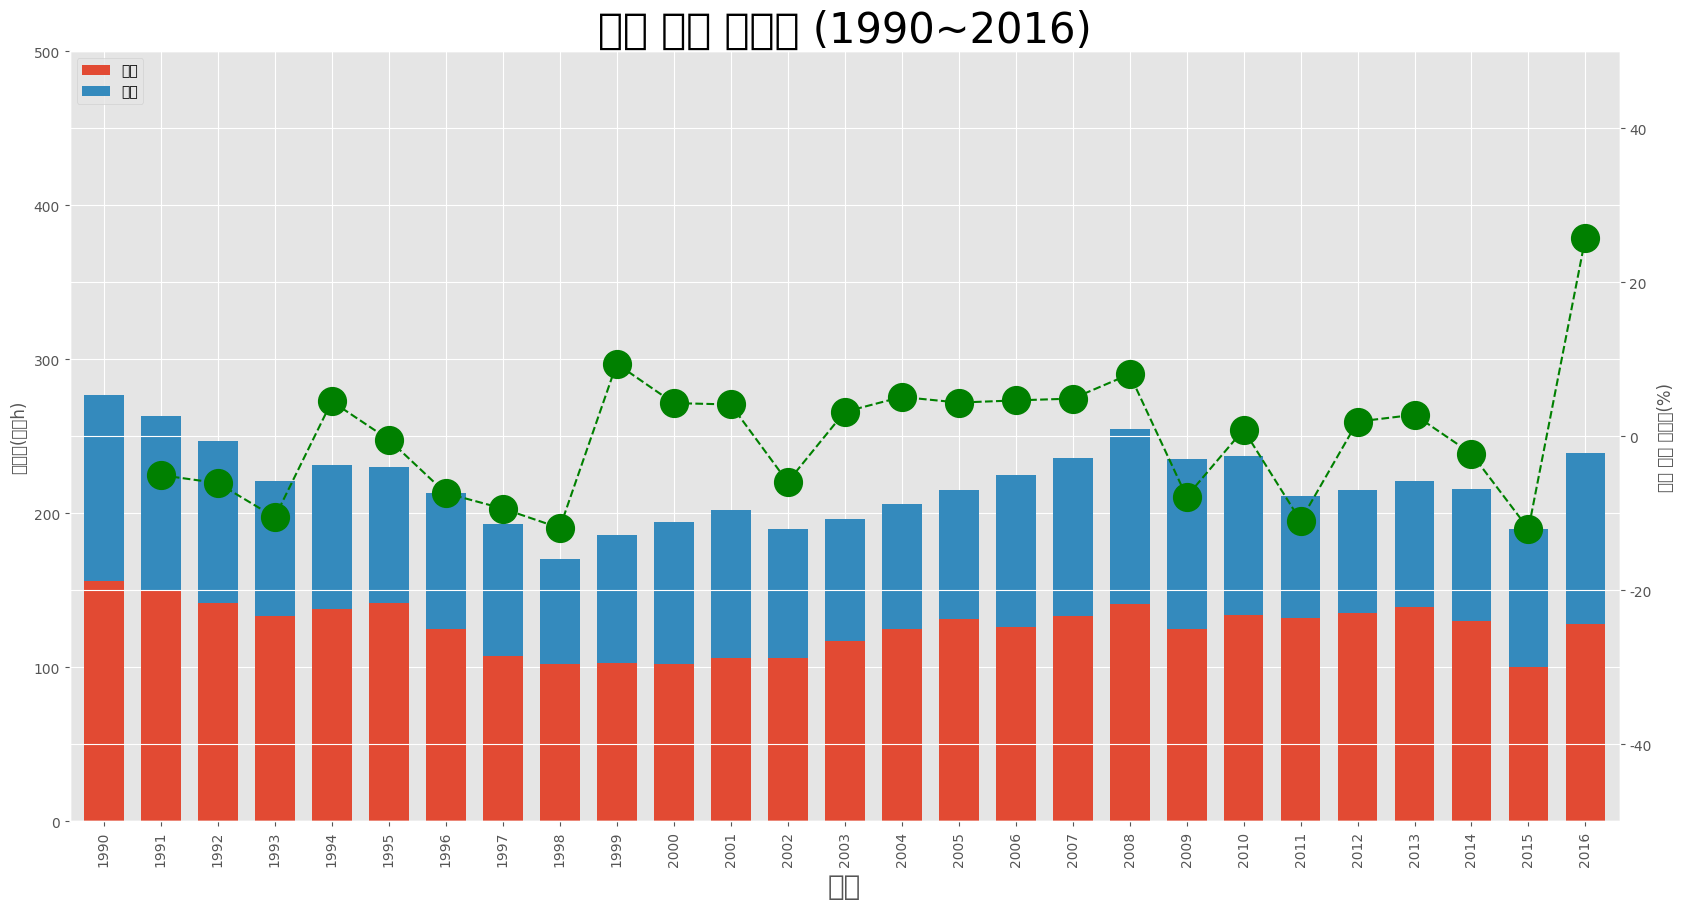

In [ ]:
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False # 마이너스 부호 깨짐 방지

df=pd.read_excel('./data/남북한발전전력량.xlsx')
df=df.loc[5:9]
df.drop('전력량 (억㎾h)',axis='columns',inplace=True) # inplace=True로 설정하면 기존의 df에도 drop 함수가 적용됨 (원래 drop함수는 삭제된 개체를 반환하는 것이지만 inplace 옵션을 사용하면 원본에도 반영됨)
df.set_index('발전 전력별',inplace=True)
df=df.T

for col in df.columns: # df.columns에는 앞선 전치로 인해 '화력, 수력'과 같은 요소가 들어있음
    df[col]=df[col].replace("-","0") # df[col]은 col열의 모든 요소. 값이 -인 요소를 0으로 변경

df=df.astype(float)

df=df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년']=df['총발전량'].shift(1) # '총발전량' 열의 데이터를 1행씩 뒤로 이동시켜서 '총발전량 - 1년' 열을 새로 생성
df['증감율']=((df['총발전량']/df['총발전량 - 1년'])-1)*100

ax1=df[['수력','화력']].plot(kind='bar',figsize=(20,10),width=0.7,stacked=True)
ax2=ax1.twinx() # ax1 객체의 쌍둥이 객체 생성
ax2.plot(df.index,df.증감율,ls='--',marker='o',markersize=20,color='green',label='전년대비 증감율(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도',size=20)
ax1.set_ylabel('전력량(억㎾h)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990~2016)',size=30)
ax1.legend(loc='upper left')

plt.show()

# Histogram

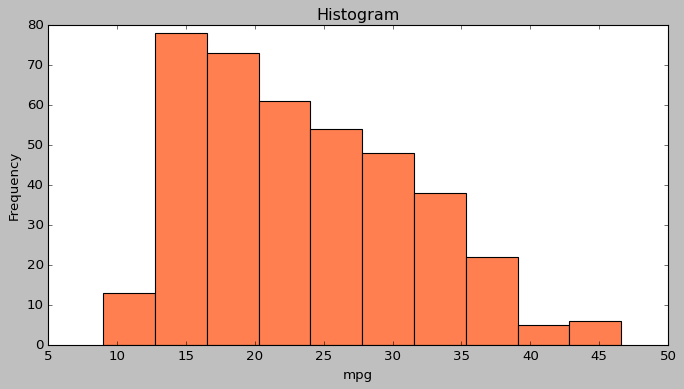

In [ ]:
plt.style.use('classic')

df=pd.read_csv('./data/auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['mpg'].plot(kind='hist',bins=10,color='coral',figsize=(10,5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

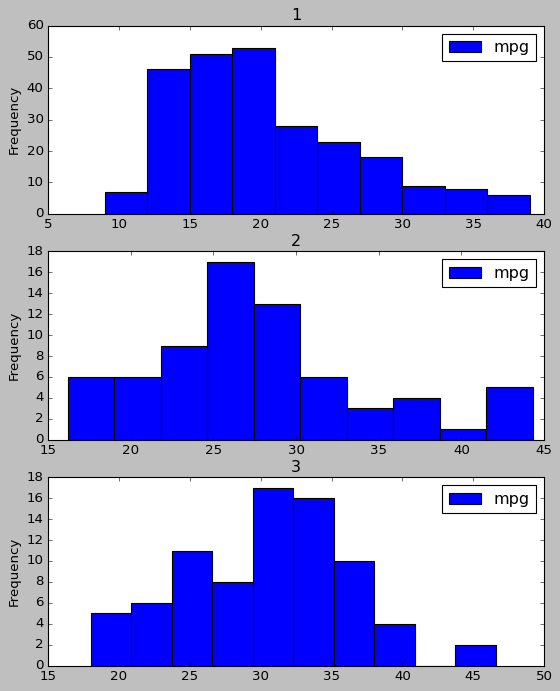

In [ ]:
df[['mpg','origin']].plot(by=['origin'],kind='hist',figsize=(8,10));

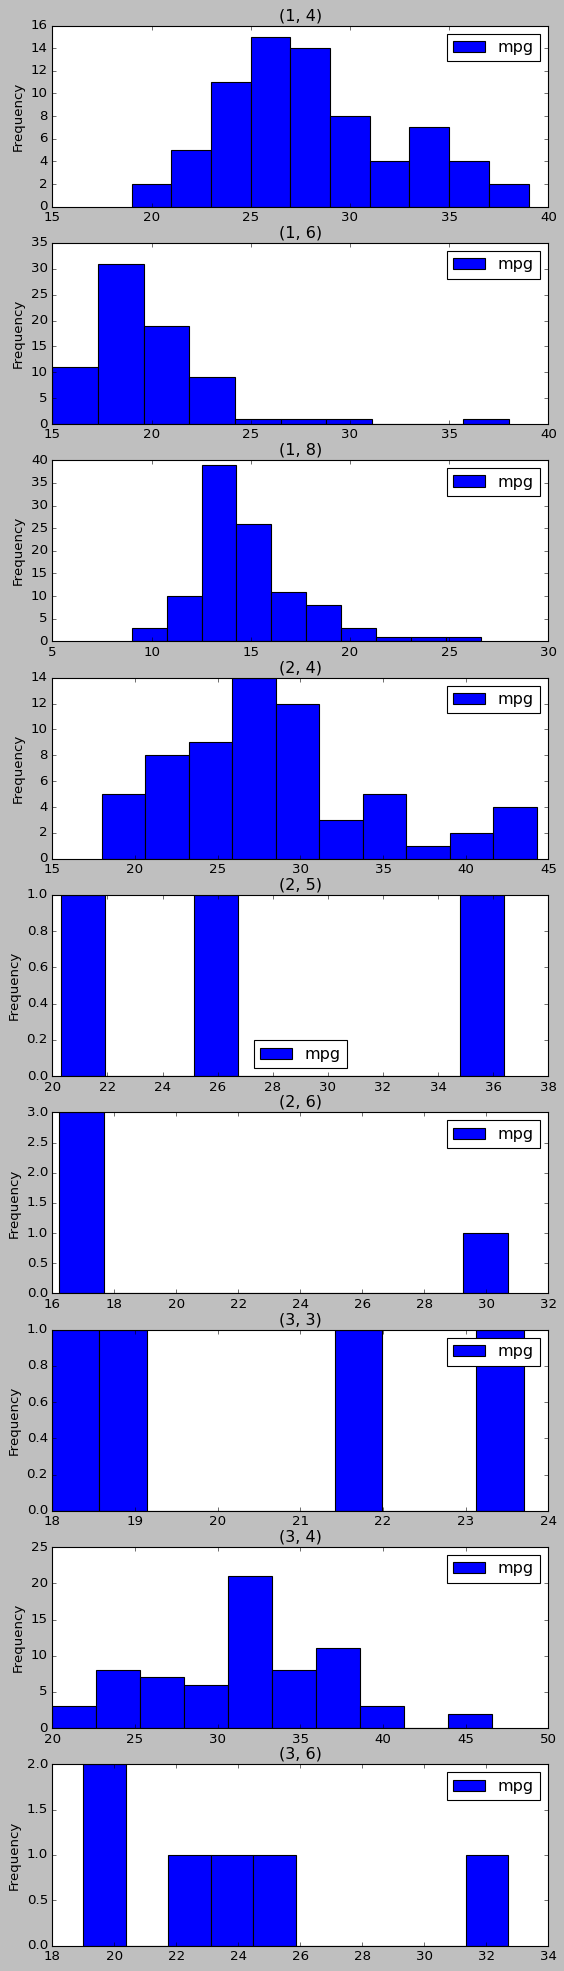

In [ ]:
df[['mpg','origin','cylinders']].plot(by=['origin','cylinders'],kind='hist',figsize=(8,30));

# Scatter Plot

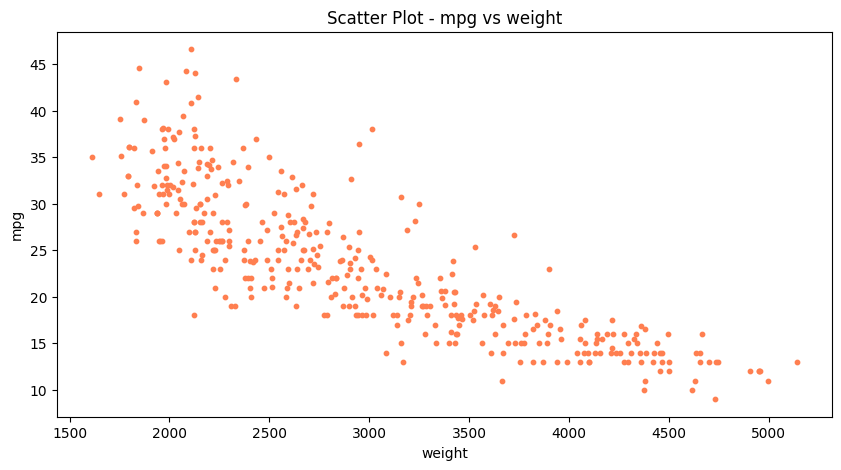

In [ ]:
plt.style.use('default')

df=pd.read_csv('./data/auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df.plot(kind='scatter',x='weight',y='mpg',c='coral',s=10,figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

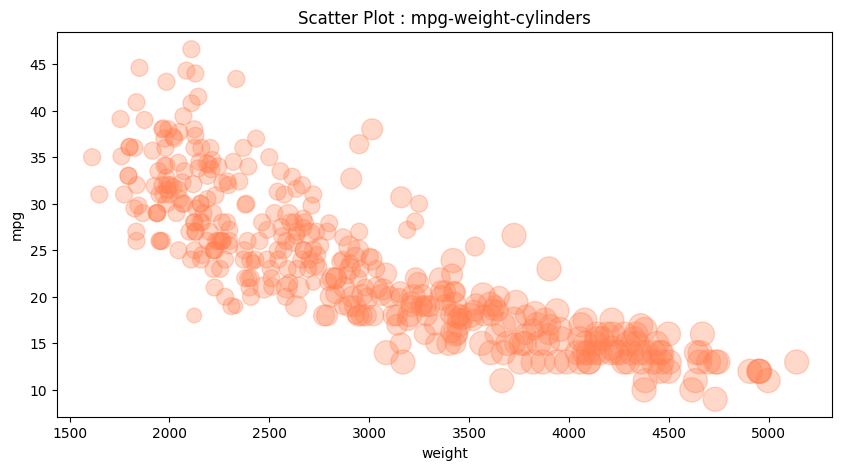

In [ ]:
cylinders_size=(df.cylinders/df.cylinders.max())*300

df.plot(kind='scatter',x='weight',y='mpg',c='coral',figsize=(10,5),s=cylinders_size,alpha=0.3)
plt.title('Scatter Plot : mpg-weight-cylinders')
plt.show()

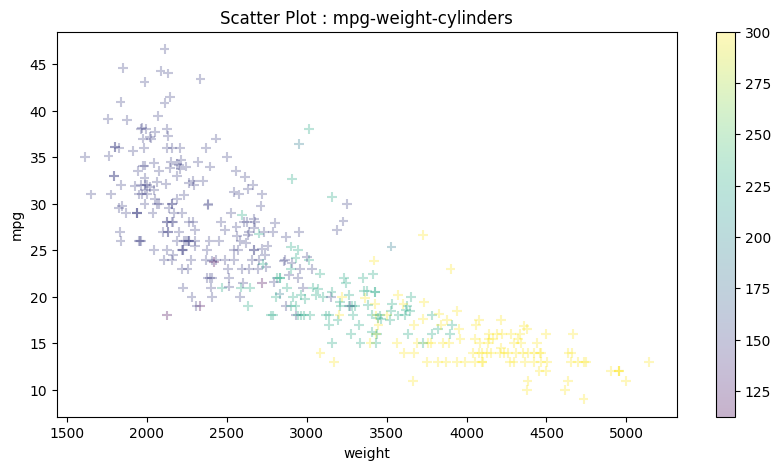

In [ ]:
cylinders_size=(df['cylinders']/df['cylinders'].max())*300

df.plot(kind='scatter',x='weight',y='mpg',marker='+',figsize=(10,5),cmap='viridis',c=cylinders_size,s=50,alpha=0.3)
plt.title('Scatter Plot : mpg-weight-cylinders')

plt.savefig("./data/scatter.png")
plt.savefig("./data/scatter_transparent.png",transparent=True)

plt.show()

# Pie Chart

In [5]:
df=pd.read_csv('./data/auto-mpg.csv',header=None)

plt.style.use('default')

df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['count']=1 # 모든 값이 1인 'count' 열 추가
df_origin=df.groupby('origin').sum(numeric_only=True) # numeric_only=True 를 이용해 숫자 데이터만 sum 적용
df_origin.head()

,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [6]:
df_origin.index=['USA','EU','JAPAN']
df_origin.head()

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


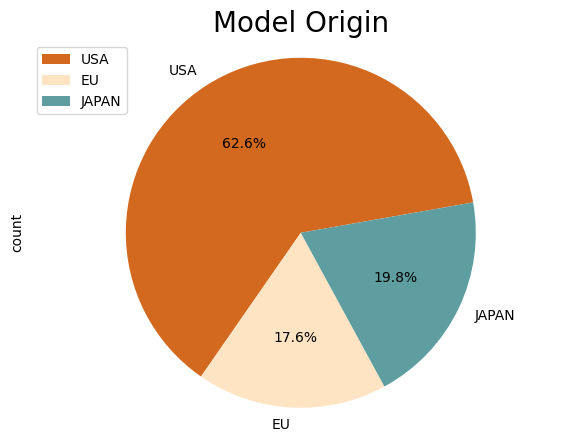

In [10]:
df_origin['count'].plot(kind='pie',
                        figsize=(7,5),
                        autopct='%1.1f%%', # 앞 %는 포맷 지정자, 뒤 %%는 % 그대로를 출력하기 위함
                        startangle=10, # 파이 조각을 나누는 시작 위치 (단위 : 도)
                        colors=['chocolate','bisque','cadetblue'])

plt.title('Model Origin',size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index,loc='upper left')
plt.show()

# Box Plot

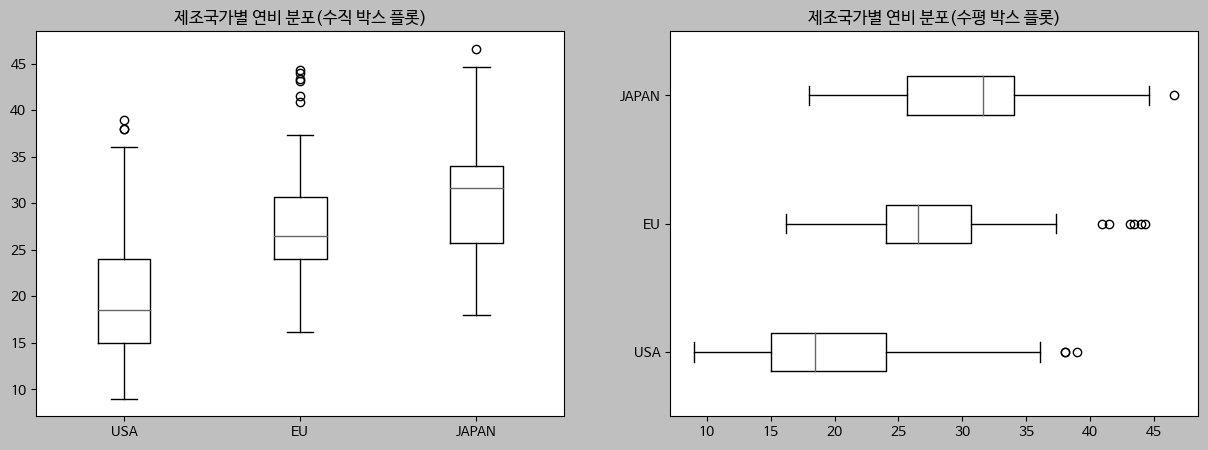

In [4]:
plt.style.use('grayscale')
plt.rcParams['axes.unicode_minus']=False

df=pd.read_csv('./data/auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'],
            vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

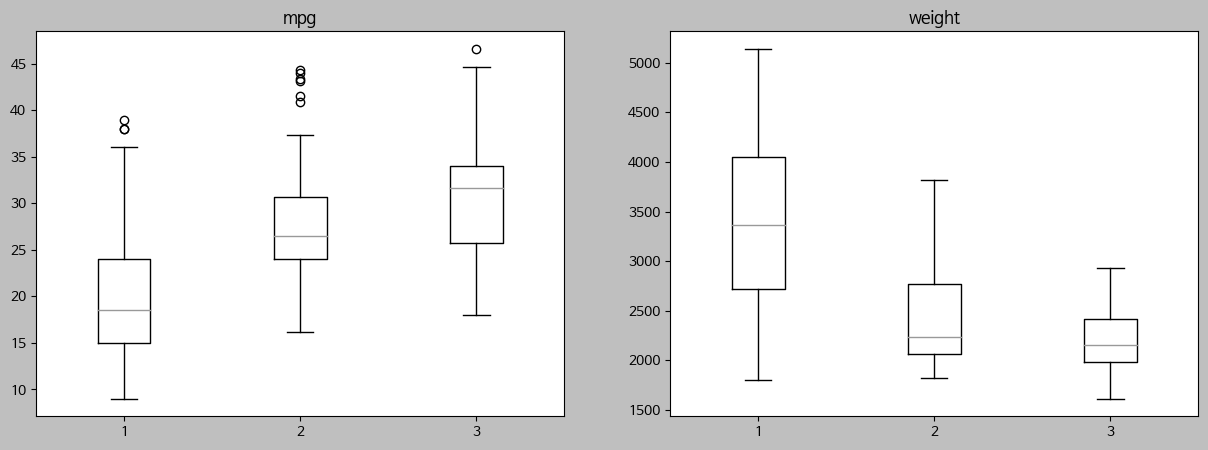

In [6]:
df.plot(kind='box',column=['mpg','weight'],by=['origin'],figsize=(15,5));

,0
mpg,"Axes(0.125,0.11;0.775x0.77)"


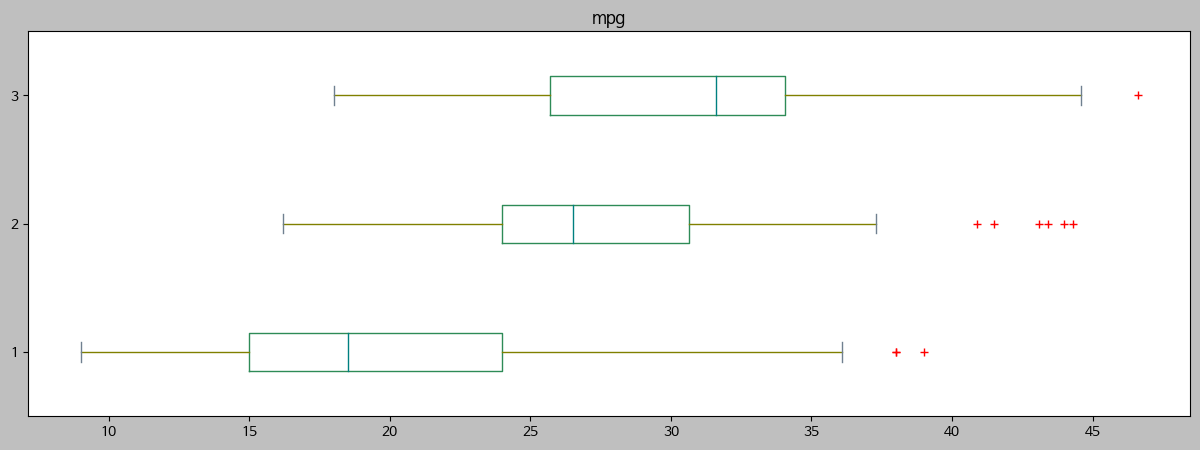

In [7]:
color={
    "boxes":"SeaGreen", # 박스
    "whiskers":"Olive", # 데이터의 범위를 나타내는 선
    "medians":"Teal", # 중앙값을 나타내는 선
    "caps":"SlateGray" # 데이터의 범위를 나타내는 선의 끝부분
}

df.plot(kind='box',column=['mpg'],by=['origin'],figsize=(15,5),color=color,sym="r+",vert=False)